## What are the steps we are going to take

#### 1.Importing the libraries
#### 2. Data Cleaning and Handelling
#### 3. Applying Sanity Checks
#### 4. Handelling Outliers
#### 5. Visualizing the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
play_store = pd.read_csv("googleplaystore_v2.csv")
play_store.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews     Size     Installs  Type Price Content Rating  \
0     159  19000.0      10,000+  Free     0       Everyone   
1     967  14000.0     500,000+  Free     0       Everyone   
2   87510   8700.0   5,000,000+  Free     0       Everyone   
3  215644  25000.0  50,000,000+  Free     0           Teen   
4     967   2800.0     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [3]:
# Finding out how many rows and columns we are dealing with. 

play_store.shape

(10841, 13)

In [4]:
# Datatype and other deatails of the columns.. 

play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


# Data Cleaning and Handelling

In [5]:
# Finding Out the missing values in each column... 

play_store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
# As we can see 'Ratings' has the highest number of missing values... 
# One way is to replace the value with 0
# Other is to drop the values

play_store1 = play_store[~play_store["Rating"].isnull()]
play_store1.shape

(9367, 13)

In [7]:
# After dealing with 'Rating' null values we are left with (9367, 13) in a new dataset. 
# Lets see the other missing values.. 
play_store1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [8]:
play_store1[play_store1["Android Ver"].isnull()]

App         Category  Rating  \
4453                    [substratum] Vacuum: P  PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]  PERSONALIZATION     4.5   
10472  Life Made WI-Fi Touchscreen Photo Frame              1.9    19.0   

      Reviews          Size Installs  Type     Price Content Rating  \
4453      230  11000.000000   1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000  10,000+  Free         0       Everyone   
10472    3.0M  21516.529524     Free     0  Everyone            NaN   

                  Genres    Last Updated Current Ver Android Ver  
4453     Personalization   July 20, 2018         4.4         NaN  
4490     Personalization  March 27, 2018         1.1         NaN  
10472  February 11, 2018          1.0.19  4.0 and up         NaN

In [9]:
# Dropping the faulty row 10472 as it has all the values shifted to the left.. 

play_store1 = play_store1[~(play_store1["Android Ver"].isnull() & (play_store1["Category"] == "1.9"))]

In [10]:
play_store1["Android Ver"].isnull().sum()

2

In [11]:
# For the other 2 null values in Android Version we will go with the most occuring value and replace them with nulls.
# from the below results 4.1 and up is the most occuring value 

play_store1["Android Ver"].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [12]:
play_store1["Android Ver"] = play_store1["Android Ver"].fillna("4.1 and up")

In [13]:
play_store1["Android Ver"].isnull().sum()

0

In [14]:
# Dealing with other columns having missing values.... 

play_store1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [15]:
# We will apply the similar approach for current version with other method

play_store1["Current Ver"] = play_store1["Current Ver"].fillna(play_store1["Current Ver"].mode()[0])

In [16]:
# None of the columns have missing values now..... 

play_store1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [17]:
# Lets look into the dtype of the other values to make sure they are correct.
# As we can see below 'Price' column has an object dtype instead of int or float. Lets find out why?

play_store1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [18]:
# The clear reason here is that it has $ sign 

play_store1["Price"].value_counts()

Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

In [19]:
play_store1["Price"] = play_store1["Price"].apply(lambda x: 0 if x == "0" else float(x[1:]))

In [20]:
# We successfully changed the dtype of price from object to float.. 

play_store1["Price"].dtype

dtype('float64')

In [21]:
# Another column is 'Reviews' No. of reviews on the app which should be in int... 
# looks like all the values are in int but 
# due the earlier error of values shifting to the left, python understood the entire column to be an object..  

play_store1["Reviews"].value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [22]:
play_store1["Reviews"] = play_store1["Reviews"].astype("int32")

In [23]:
play_store1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int32(1), object(9)
memory usage: 987.8+ KB


In [24]:
# Handelling the installs column as it is also an object instead of int. 

play_store1.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews     Size     Installs  Type  Price Content Rating  \
0      159  19000.0      10,000+  Free    0.0       Everyone   
1      967  14000.0     500,000+  Free    0.0       Everyone   
2    87510   8700.0   5,000,000+  Free    0.0       Everyone   
3   215644  25000.0  50,000,000+  Free    0.0           Teen   
4      967   2800.0     100,000+  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [25]:
# Handelling 'Installs' and converting the same to int. 

play_store1["Installs"] = play_store1["Installs"].apply(lambda x: int(x[:-1].replace(",", "")))

In [26]:
play_store1["Installs"].describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

# Applying Sanity Checks

In [27]:
#1. Finding out if 'Rating' column has ratings from 1 - 5 stars as >5 is an anomaly. 
# Below min is 1 and max is 5. So ratings are good to go. 

play_store1["Rating"].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [28]:
#2. Next is Reviews should be less than or equals to Installs. 
# If someone has Reviewed the app without installing then it is a false review. 

play_store1[play_store1["Reviews"] > play_store1["Installs"]]

App   Category  Rating  Reviews  \
2454             KBA-EZ Health Guide    MEDICAL     5.0        4   
4663   Alarmy (Sleep If U Can) - Pro  LIFESTYLE     4.8    10249   
5917                        Ra Ga Ba       GAME     5.0        2   
6700                Brick Breaker BR       GAME     5.0        7   
7402            Trovami se ci riesci       GAME     5.0       11   
8591                         DN Blog     SOCIAL     5.0       20   
10697                        Mu.F.O.       GAME     5.0        2   

               Size  Installs  Type  Price Content Rating     Genres  \
2454   25000.000000         1  Free   0.00       Everyone    Medical   
4663   21516.529524     10000  Paid   2.49       Everyone  Lifestyle   
5917   20000.000000         1  Paid   1.49       Everyone     Arcade   
6700   19000.000000         5  Free   0.00       Everyone     Arcade   
7402    6100.000000        10  Free   0.00       Everyone     Arcade   
8591    4200.000000        10  Free   0.00           Teen     Social   
10697  16000.000000         1  Paid   0.99       Everyone     Arcade   

           Last Updated         Current Ver         Android Ver  
2454     August 2, 2018              1.0.72        4.0.3 and up  
4663      July 30, 2018  Varies with device  Varies with device  
5917   February 8, 2017               1.0.4          2.3 and up  
6700      July 23, 2018                 1.0          4.1 and up  
7402     March 11, 2017                 0.1          2.3 and up  
8591      July 23, 2018                 1.0          4.0 and up  
10697     March 3, 2017                 1.0          2.3 and up

In [29]:
# Above as we can see there are total 7 records with the anomaly. 
# The best move here is to drop such records as they can hamper the sanity of the data set. 

play_store1 = play_store1[~(play_store1["Reviews"] > play_store1["Installs"])]

In [30]:
# There are no such records now. 

play_store1[play_store1["Reviews"] > play_store1["Installs"]]

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [31]:
#3. For 'Type = Free' apps there should not be any price means 'Price = 0'
# There are no such rows where Free has a price. So this sanity check is successful. 

play_store1[((play_store1["Type"] == "Free") & (play_store1["Price"] > 0))] 

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

# Handelling Outliers

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

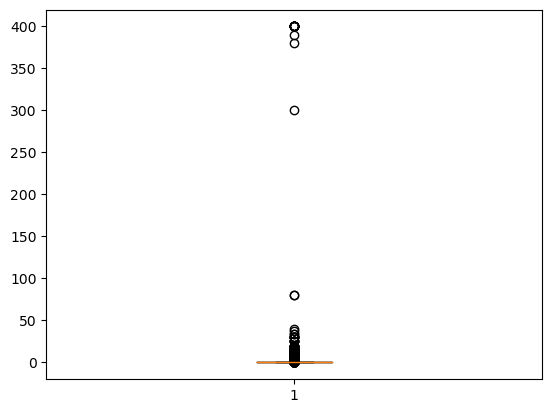

In [33]:
# Seeing boxplot for Price column 
# We can barely see a boxplot but there are a bunch of outliers that we need to deal with... 

plt.boxplot(play_store1["Price"])
plt.show()

In [34]:
play_store1 = play_store1[~(play_store1["Price"] > 200)]

In [35]:
play_store1["Price"].describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

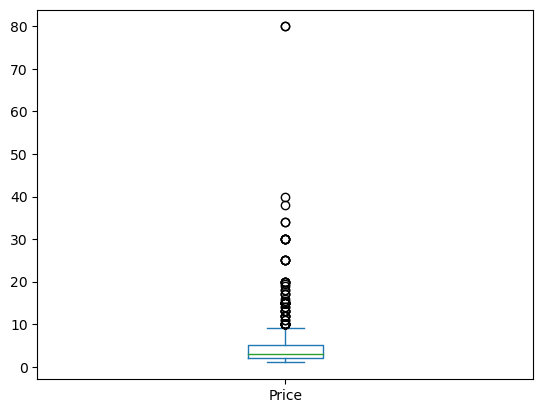

In [36]:
play_store1[play_store1.Price>0].Price.plot.box()
plt.show()

In [37]:
# Limiting our dataset to price < 30

play_store1[play_store1["Price"] > 30]

App   Category  Rating  Reviews     Size  \
2253  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2301    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2365  Vargo Anesthesia Mega App    MEDICAL     4.6       92  32000.0   
2402    A Manual of Acupuncture    MEDICAL     3.5      214  68000.0   
2414               LTC AS Legal    MEDICAL     4.0        6   1300.0   
5360           I am Rich Person  LIFESTYLE     4.2      134   1800.0   

      Installs  Type  Price Content Rating     Genres     Last Updated  \
2253      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2301      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2365      1000  Paid  79.99       Everyone    Medical    June 18, 2018   
2402      1000  Paid  33.99       Everyone    Medical  October 2, 2017   
2414       100  Paid  39.99       Everyone    Medical    April 4, 2018   
5360      1000  Paid  37.99       Everyone  Lifestyle    July 18, 2017   

     Current Ver   Android Ver  
2253        19.0  4.0.3 and up  
2301      2.1.35    4.0 and up  
2365        19.0  4.0.3 and up  
2402      2.1.35    4.0 and up  
2414       3.0.1    4.1 and up  
5360         1.0  4.0.3 and up

In [38]:
play_store1 = play_store1[~(play_store1["Price"] > 30)]

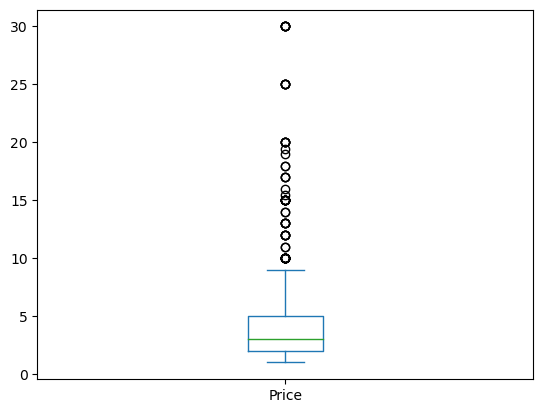

In [39]:
play_store1[play_store1.Price>0].Price.plot.box()
plt.show()

In [40]:
# After handelling the null values, applying sanity checks and handelling outliers, we have a final dataset.. 

play_store1.shape

(9338, 13)

# Visualizing the data 

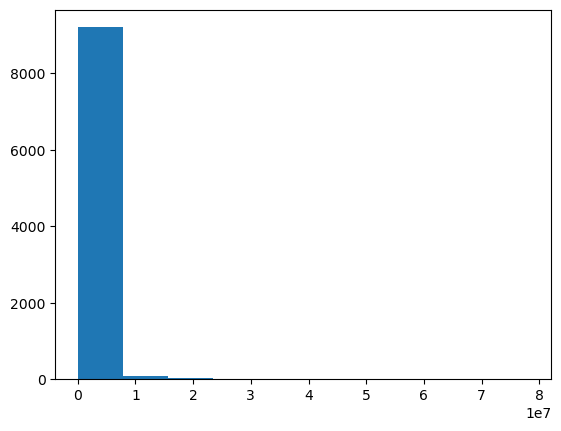

In [41]:
plt.hist(play_store1["Reviews"])
plt.show()

In [42]:
# Below are the apps although genuine but are mega-successful apps which are not much of help for us. 
# So lets make the dataset more concise to get to the results.. 

play_store1[play_store1["Reviews"] > 1000000]

App             Category  Rating  \
139                      Wattpad 📖 Free Books  BOOKS_AND_REFERENCE     4.6   
152                         Google Play Books  BOOKS_AND_REFERENCE     3.9   
189                               Uber Driver             BUSINESS     4.4   
194    OfficeSuite : Free Office + PDF Editor             BUSINESS     4.3   
201                    Facebook Pages Manager             BUSINESS     4.0   
...                                       ...                  ...     ...   
10190                         Fallout Shelter               FAMILY     4.6   
10200                  Facebook Pages Manager             BUSINESS     4.0   
10327                        Garena Free Fire                 GAME     4.5   
10636                      FRONTLINE COMMANDO                 GAME     4.4   
10707          Photo Editor Collage Maker Pro          PHOTOGRAPHY     4.5   

       Reviews          Size    Installs  Type  Price Content Rating  \
139    2914724  21516.529524   100000000  Free    0.0           Teen   
152    1433233  21516.529524  1000000000  Free    0.0           Teen   
189    1254730  21516.529524    10000000  Free    0.0       Everyone   
194    1002861  35000.000000   100000000  Free    0.0       Everyone   
201    1279184  21516.529524    50000000  Free    0.0       Everyone   
...        ...           ...         ...   ...    ...            ...   
10190  2721923  25000.000000    10000000  Free    0.0           Teen   
10200  1279800  21516.529524    50000000  Free    0.0       Everyone   
10327  5534114  53000.000000   100000000  Free    0.0           Teen   
10636  1351833  12000.000000    10000000  Free    0.0           Teen   
10707  1519671  21516.529524   100000000  Free    0.0       Everyone   

                  Genres      Last Updated         Current Ver  \
139    Books & Reference    August 1, 2018  Varies with device   
152    Books & Reference    August 3, 2018  Varies with device   
189             Business    August 3, 2018  Varies with device   
194             Business    August 2, 2018           9.7.14188   
201             Business    August 2, 2018  Varies with device   
...                  ...               ...                 ...   
10190         Simulation     June 11, 2018             1.13.12   
10200           Business    August 6, 2018  Varies with device   
10327             Action    August 3, 2018              1.21.0   
10636             Action  October 28, 2013               3.0.3   
10707        Photography  February 1, 2018  Varies with device   

              Android Ver  
139    Varies with device  
152    Varies with device  
189    Varies with device  
194            4.1 and up  
201    Varies with device  
...                   ...  
10190          4.1 and up  
10200  Varies with device  
10327        4.0.3 and up  
10636          2.1 and up  
10707  Varies with device  

[704 rows x 13 columns]

In [43]:
play_store1 = play_store1[~(play_store1["Reviews"] > 1000000)]

In [44]:
play_store1.shape

(8634, 13)

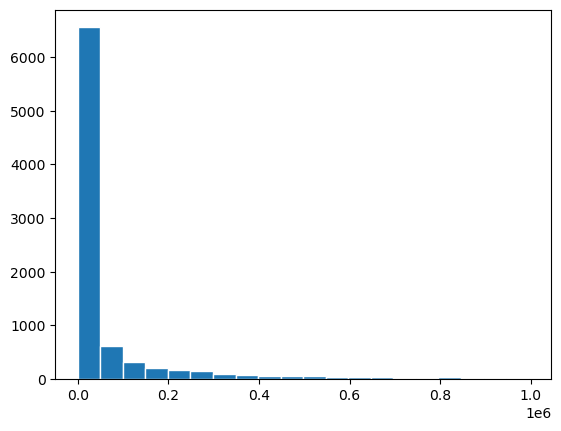

In [48]:
plt.hist(play_store1["Reviews"], bins=20, edgecolor = "White")
plt.show()